# This week in AI

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re


In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


In [ ]:
data = pd.read_csv('kindle_reviews.csv')
data.head()

In [ ]:
# Preprocess text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [ ]:

def preprocess_text(text):
    # Handle non-string inputs
    if not isinstance(text, str):
        return ""
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


In [ ]:
# Apply preprocessing
data['cleaned_review'] = data['reviewText'].apply(preprocess_text)

# Create sentiment labels: 1-2 stars = negative (0), 4-5 stars = positive (1)
data['sentiment'] = data['overall'].apply(lambda x: 0 if x <= 2 else 1 if x >= 4 else -1)
data = data[data['sentiment'] != -1] # Remove neutral reviews

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
 data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42
)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Detailed Report:\n", classification_report(y_test, predictions))

# Optional: Display important words
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
word_importance = pd.DataFrame({'word': feature_names, 'coefficient': coefficients})
print("\nTop 5 Positive Words:")
print(word_importance.sort_values(by='coefficient', ascending=False).head())
print("\nTop 5 Negative Words:")
print(word_importance.sort_values(by='coefficient').head())


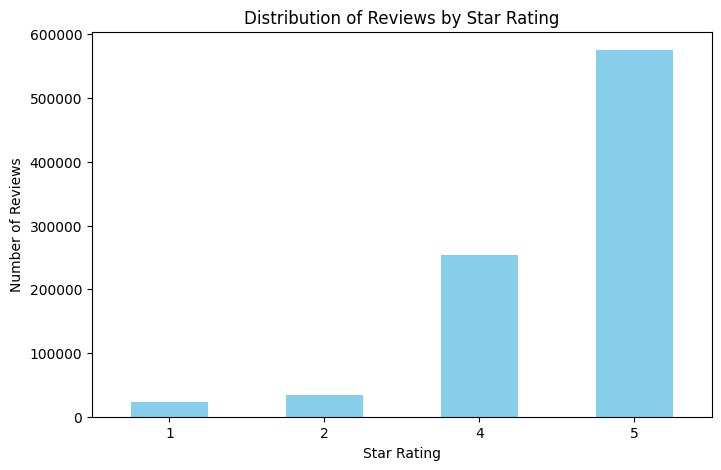

In [19]:
import matplotlib.pyplot as plt

# Count the number of reviews for each star rating
star_counts = data['overall'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8, 5))
star_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Star Rating')
plt.xticks(rotation=0)
plt.show()

In [20]:
data['overall'].value_counts().sort_index()

overall
1     23018
2     34130
4    254013
5    575264
Name: count, dtype: int64